In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [47]:
ac = pd.read_csv('datasets\\accident_data.csv')

In [48]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [49]:
ac.describe(include='all')

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,660679,660679,660679,660654.000000,660679,660679,660653.000000,660679.000000,660679.000000,659953,656159,660664,646551,660679
unique,421020,3,1461,NaN,5,422,NaN,NaN,NaN,5,5,3,8,16
top,2.01E+12,Slight,30-11-2019,NaN,Daylight,Birmingham,NaN,NaN,NaN,Dry,Single carriageway,Urban,Fine no high winds,Car
freq,239478,563801,704,NaN,484880,13491,NaN,NaN,NaN,447821,492143,421663,520885,497992
mean,NaN,NaN,NaN,52.553866,NaN,NaN,-1.431210,1.357040,1.831255,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.406922,NaN,NaN,1.383330,0.824847,0.715269,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,49.914430,NaN,NaN,-7.516225,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,51.490690,NaN,NaN,-2.332291,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,52.315641,NaN,NaN,-1.411667,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,53.453452,NaN,NaN,-0.232869,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [50]:
ac.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [51]:
ac['District Area'] = ac['District Area'].fillna(ac['District Area'].mode()[0])

In [52]:
ac['Longitude'] = ac['Longitude'].fillna(ac['Longitude'].mode()[0])

In [53]:
ac['Urban_or_Rural_Area'] = ac['Urban_or_Rural_Area'].fillna(ac['Urban_or_Rural_Area'].mode()[0])

In [54]:
ac['Latitude'] = ac['Latitude'].fillna(ac['Latitude'].mode()[0])

In [55]:
ac['Weather_Conditions'] = ac['Weather_Conditions'].fillna('unaccounted')

In [56]:
ac.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [57]:
ac['Accident_Severity'] = ac['Accident_Severity'].astype('category')

In [58]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], dayfirst = True, errors = 'coerce')

In [59]:
ac.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [60]:
ac['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

In [61]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], errors='coerce')

In [62]:
ac['Year'] = ac['Accident Date'].dt.year

In [63]:
ac['Accident Date'] = pd.to_datetime(ac['Accident Date'], errors='coerce')

In [64]:
ac['Month'] = ac['Accident Date'].dt.month

<h1>Insight 1</h1>
<h2> Total accidents by severity </h2>

<function matplotlib.pyplot.show(close=None, block=None)>

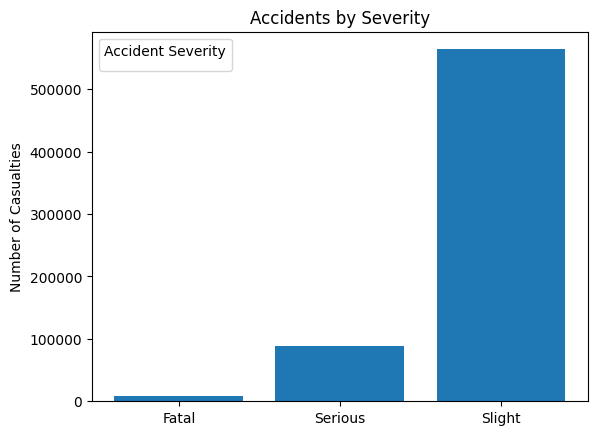

In [65]:
accidents_by_severity = ac.groupby([ 'Accident_Severity'])['Number_of_Casualties'].size().reset_index()

accidents_by_severity

plt.bar(accidents_by_severity['Accident_Severity'], accidents_by_severity['Number_of_Casualties'])
plt.title('Accidents by Severity')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.show


<h1>Insight 2</h1>
<h2> Average casualties per year </h2>

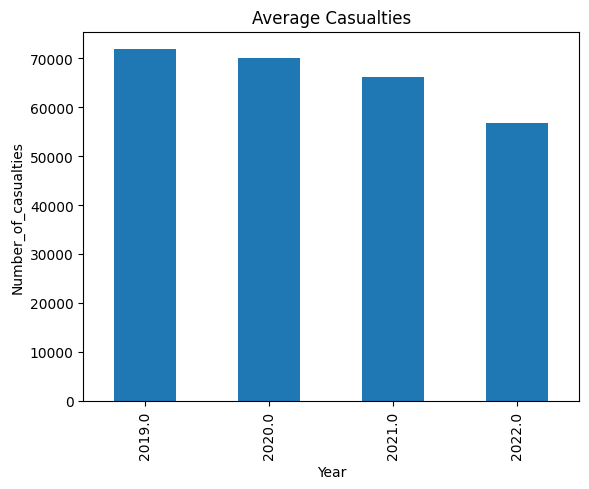

In [66]:
avg_casualties = ac.groupby('Year')['Number_of_Casualties'].mean().reset_index()
avg_casualties.unstack()
avg_casualties


avg_casualties = ac['Year'].value_counts().sort_index()


avg_casualties.plot(kind='bar')
plt.title('Average Casualties')
plt.xlabel('Year')
plt.ylabel('Number_of_casualties')
plt.show()

<h1>Insight 3</h1>
<h2> Number of accidents by vehicle type in year </h2>

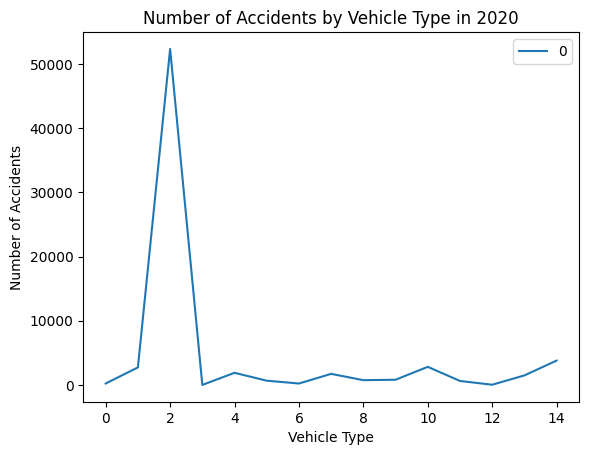

In [67]:
ac_2020 = ac[ac['Year'] == 2020]

accidents_by_vehicle_type = ac_2020.groupby('Vehicle_Type').size().reset_index()

accidents_by_vehicle_type.plot(kind='line')

plt.title('Number of Accidents by Vehicle Type in 2020')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight 4</h1>
<h2> Average number of casualties per vehicle type </h2>

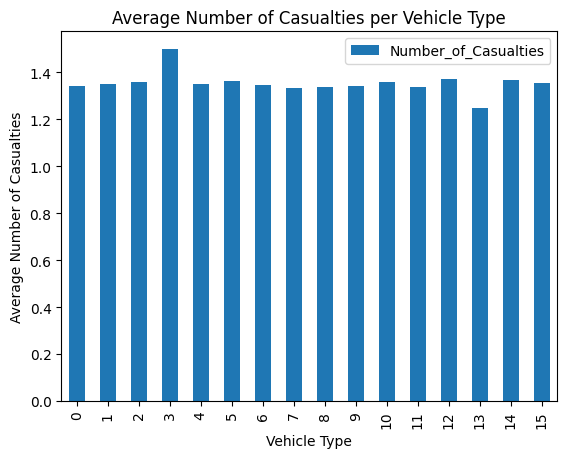

In [68]:
accidents_per_month = ac['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


avg_casualties_by_vehicle = ac.groupby('Vehicle_Type')['Number_of_Casualties'].mean().reset_index()

avg_casualties_by_vehicle.plot(kind='bar')


plt.title('Average Number of Casualties per Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Number of Casualties')
plt.show()

<h1>Insight 5</h1>
<h2> Road types with the most accidents </h2>

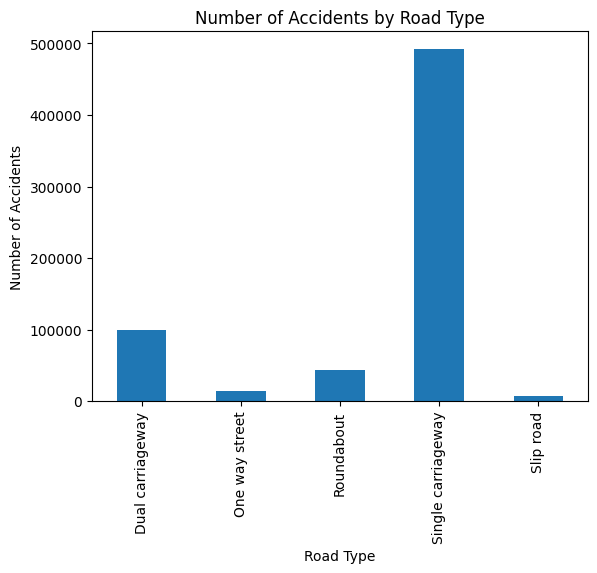

In [69]:
accidents_by_road_type = ac.groupby('Road_Type').size()

accidents_by_road_type.plot(kind='bar')

plt.title('Number of Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.show()

<h1>Insight 6</h1>
<h2> Urban vs rural accidents </h2>

<function matplotlib.pyplot.show(close=None, block=None)>

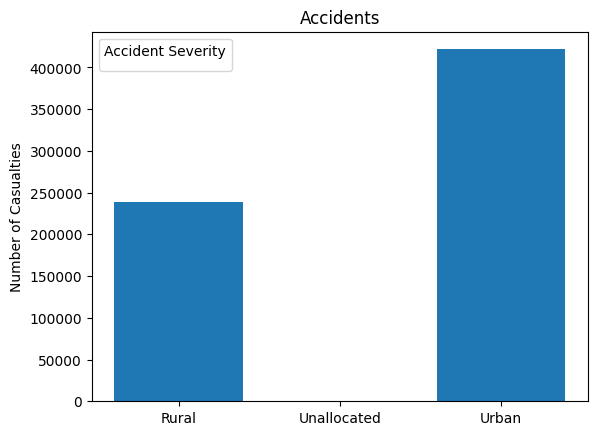

In [70]:
accidents_by_area = ac.groupby([ 'Urban_or_Rural_Area'])['Number_of_Casualties'].size().reset_index()

accidents_by_area

plt.bar(accidents_by_area['Urban_or_Rural_Area'], accidents_by_area['Number_of_Casualties'])
plt.title('Accidents')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.show


<h1>Insight 7</h1>
<h2> How does the number of casualties vary between urban and rural areas during different months? </h2>

In [76]:
casualties_by_area_month = ac.groupby(['Urban_or_Rural_Area', 'Month'])['Number_of_Casualties'].mean().reset_index()
casualties_by_area_month



,Urban_or_Rural_Area,Month,Number_of_Casualties
0,Rural,1.0,1.449215
1,Rural,2.0,1.436782
2,Rural,3.0,1.439412
3,Rural,4.0,1.525697
4,Rural,5.0,1.480169
5,Rural,6.0,1.464091
6,Rural,7.0,1.461311
7,Rural,8.0,1.521781
8,Rural,9.0,1.469270
9,Rural,10.0,1.462834


<h1>Insight 8</h1>
<h2> Average number of vehicles involved in accidents per year </h2>

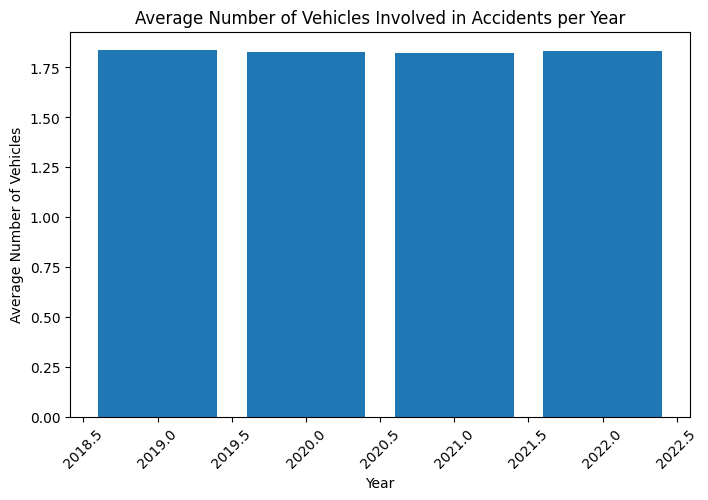

In [80]:
avg_vehicles_per_year = ac.groupby('Year')['Number_of_Vehicles'].mean()
avg_vehicles_per_year

plt.figure(figsize=(8, 5))
plt.bar(avg_vehicles_per_year.index, avg_vehicles_per_year.values)

plt.title('Average Number of Vehicles Involved in Accidents per Year')
plt.ylabel('Average Number of Vehicles')
plt.xlabel('Year')
plt.xticks(rotation=45)  
plt.show()

<h1>Insight 9</h1>
<h2> Average casualties in different weather conditions </h2>

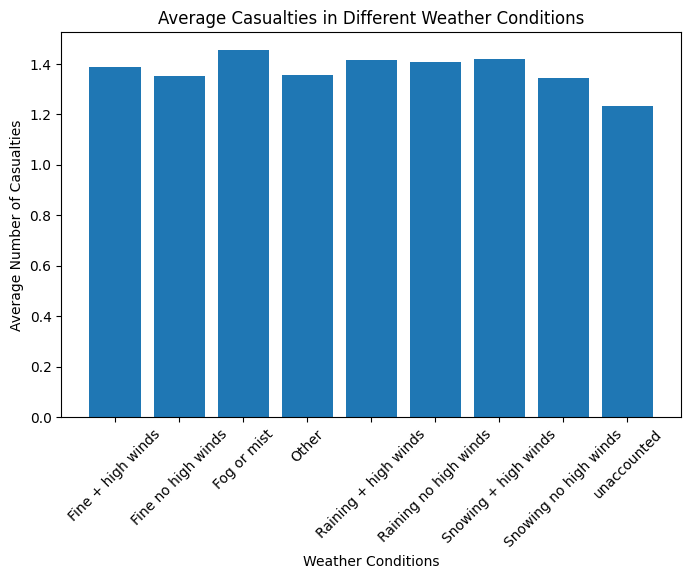

In [79]:
avg_casualties_weather = ac.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
avg_casualties_weather

import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.bar(avg_casualties_weather.index, avg_casualties_weather.values)

plt.title('Average Casualties in Different Weather Conditions')
plt.ylabel('Average Number of Casualties')
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45) 
plt.show()

<h1>Insight 10</h1>
<h2> Most common district area for accidents </h2>

In [74]:
most_common_area = ac['District Area'].mode()[0]
most_common_area

'Birmingham'

<h1>Insight 11</h1>
<h2> How does accident severity vary across different districts? </h2>

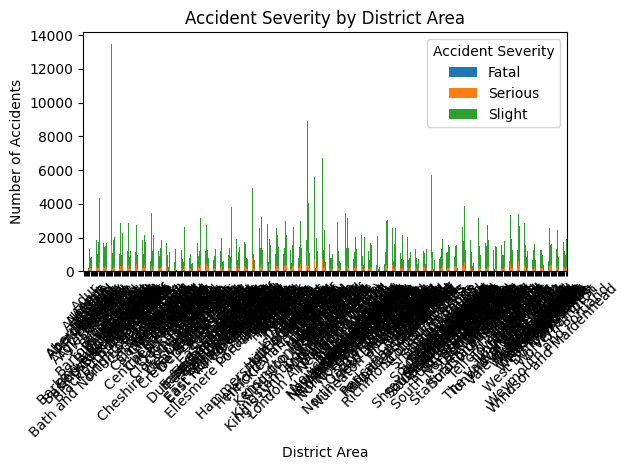

In [84]:
accidents_by_district = ac.groupby('District Area')['Accident_Severity'].value_counts()
accidents_by_district

accidents_by_district = accidents_by_district.unstack()  

accidents_by_district.plot(kind='bar', stacked=True)

plt.title('Accident Severity by District Area')
plt.ylabel('Number of Accidents')
plt.xlabel('District Area')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<h1>Insight 12</h1>
<h2> How do weather conditions impact the number of vehicles involved in accidents? </h2>

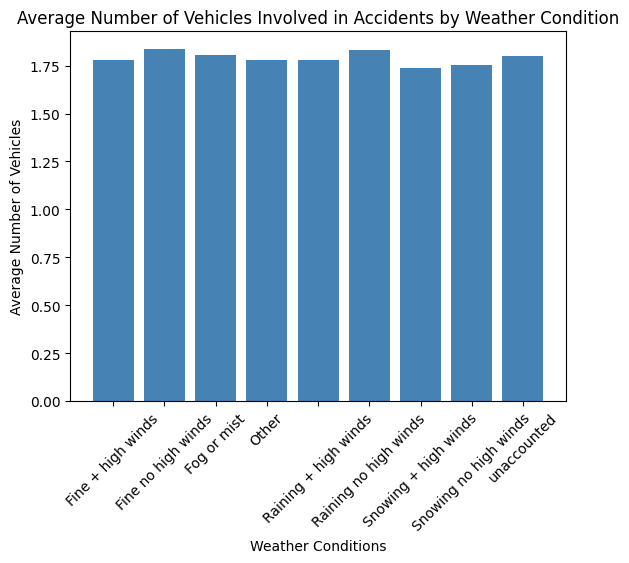

In [86]:
avg_vehicles_by_weather = ac.groupby('Weather_Conditions')['Number_of_Vehicles'].mean()
avg_vehicles_by_weather

plt.bar(avg_vehicles_by_weather.index, avg_vehicles_by_weather.values, color='steelblue')

plt.title('Average Number of Vehicles Involved in Accidents by Weather Condition')
plt.ylabel('Average Number of Vehicles')
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45)  
plt.show()

<h1>Insight 13</h1>
<h2>  Which vehicle types are most frequently involved in accidents? </h2>

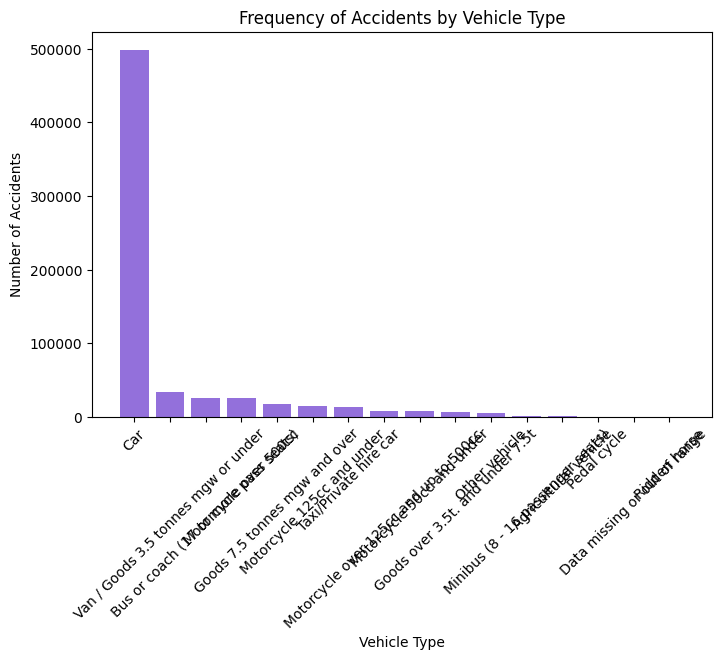

In [87]:
accidents_by_vehicle_type_count = ac.groupby('Vehicle_Type').size().idxmax()
accidents_by_vehicle_type_count

vehicle_type_counts = ac['Vehicle_Type'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(vehicle_type_counts.index, vehicle_type_counts.values, color='mediumpurple')

plt.title('Frequency of Accidents by Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45)  
plt.show()

<h1>Insight 14</h1>
<h2> How do accident casualties change based on the number of vehicles involved? </h2>


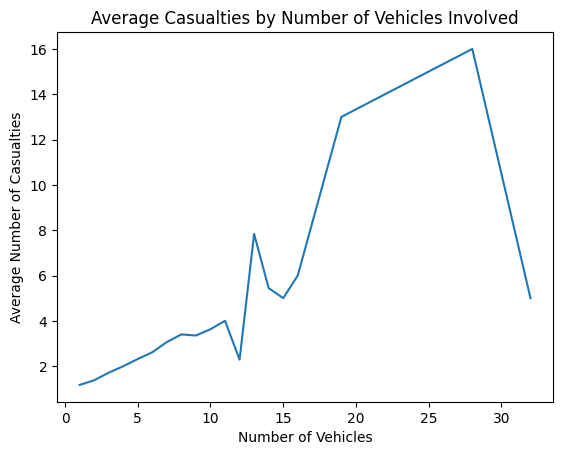

In [91]:
avg_casualties_by_vehicle_count = ac.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()
avg_casualties_by_vehicle_count

plt.plot(avg_casualties_by_vehicle_count.index, avg_casualties_by_vehicle_count.values)

plt.title('Average Casualties by Number of Vehicles Involved')
plt.ylabel('Average Number of Casualties')
plt.xlabel('Number of Vehicles')
plt.show()

<h1>Insight 15</h1>
<h2> What is the average number of casualties for each district area? </h2>

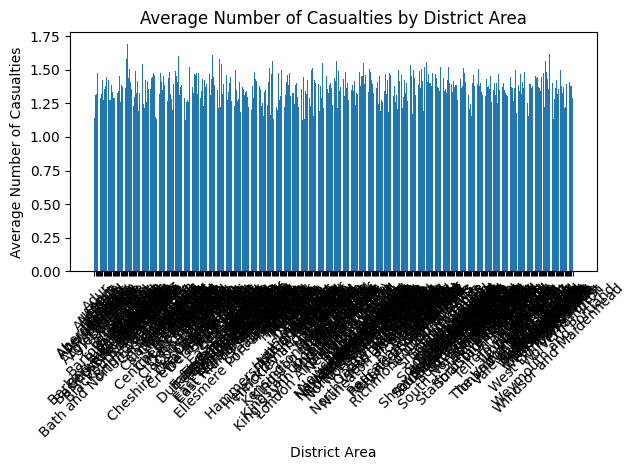

In [93]:
avg_casualties_by_district = ac.groupby('District Area')['Number_of_Casualties'].mean()
avg_casualties_by_district

plt.bar(avg_casualties_by_district.index, avg_casualties_by_district.values)

plt.title('Average Number of Casualties by District Area')
plt.ylabel('Average Number of Casualties')
plt.xlabel('District Area')
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()

The number of average is 1.3

<h1>Insight 16</h1>
<h2> What is the trend of accidents by month across multiple years? </h2>

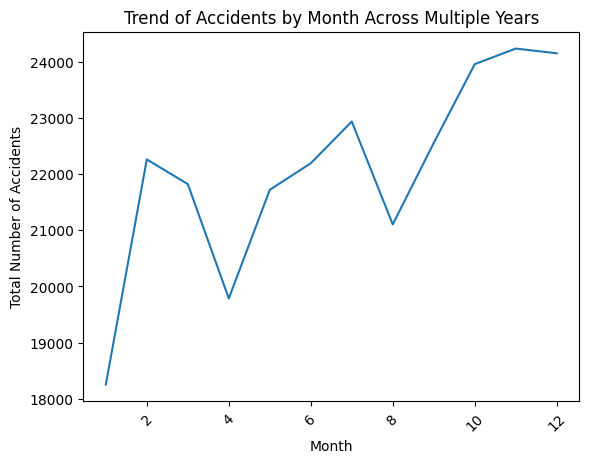

In [96]:
accidents_by_month_year = ac.groupby(['Year', 'Month']).size().unstack().sum()
accidents_by_month_year

plt.plot(accidents_by_month_year.index, accidents_by_month_year.values)

plt.title('Trend of Accidents by Month Across Multiple Years')
plt.ylabel('Total Number of Accidents')
plt.xlabel('Month')
plt.xticks(rotation=45)  
plt.show()

<h1>Insight 17</h1>
<h2>  How many accidents involve more than one vehicle? </h2>

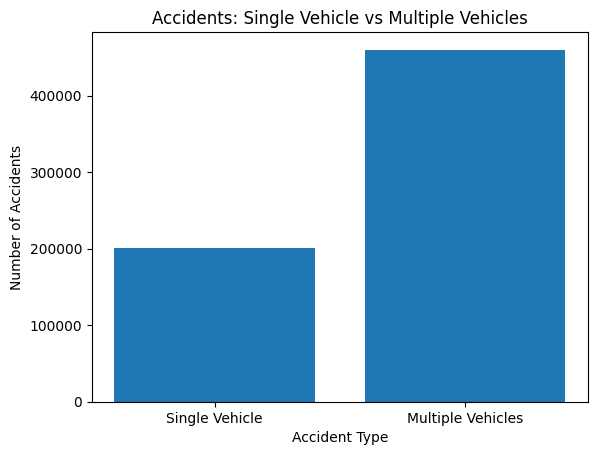

In [98]:
accidents_multiple_vehicles = ac[ac['Number_of_Vehicles'] > 1].shape[0]
accidents_multiple_vehicles

single_vehicle_accidents = ac[ac['Number_of_Vehicles'] == 1].shape[0]
multiple_vehicle_accidents = ac[ac['Number_of_Vehicles'] > 1].shape[0]

categories = ['Single Vehicle', 'Multiple Vehicles']
values = [single_vehicle_accidents, multiple_vehicle_accidents]


plt.bar(categories, values)

plt.title('Accidents: Single Vehicle vs Multiple Vehicles')
plt.ylabel('Number of Accidents')
plt.xlabel('Accident Type')
plt.show()

<h1>Insight 18</h1>
<h2>  What is the relationship between weather conditions and accident severity? </h2>

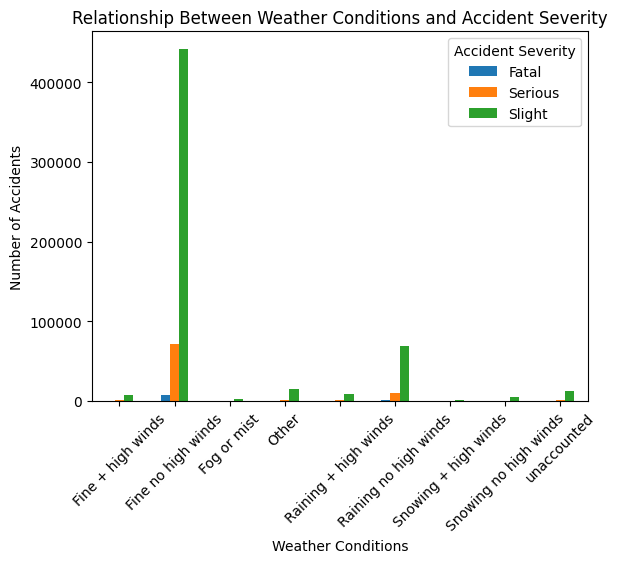

In [99]:
weather_severity_relation = ac.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().sum()
weather_severity_relation

weather_severity_relation = ac.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack()

weather_severity_relation.plot(kind='bar')

plt.title('Relationship Between Weather Conditions and Accident Severity')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Conditions')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)  
plt.show()

<h1>Insight 19</h1>
<h2> What is the average number of casualties for accidents involving motorcycles? </h2>

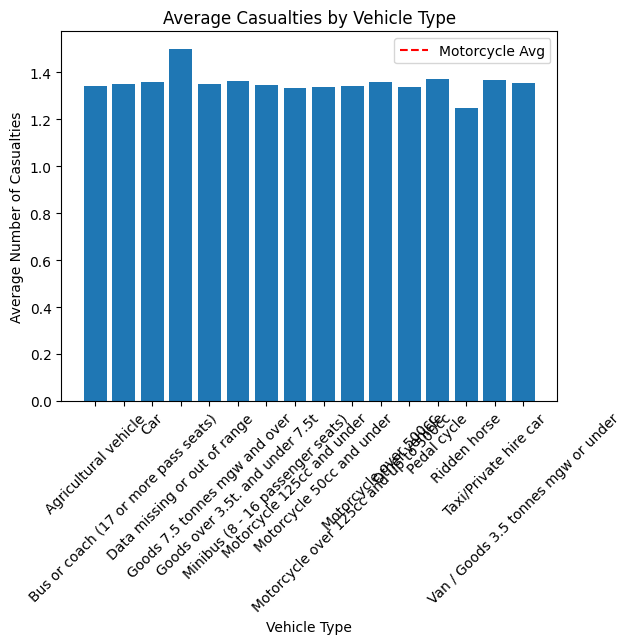

In [100]:
avg_casualties_motorcycles = ac[ac['Vehicle_Type'] == 'Motorcycle']['Number_of_Casualties'].mean()
avg_casualties_motorcycles

avg_casualties_by_vehicle_type = ac.groupby('Vehicle_Type')['Number_of_Casualties'].mean()


plt.bar(avg_casualties_by_vehicle_type.index, avg_casualties_by_vehicle_type.values)

plt.title('Average Casualties by Vehicle Type')
plt.ylabel('Average Number of Casualties')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45) 
plt.axhline(y=avg_casualties_motorcycles, color='red', linestyle='--', label='Motorcycle Avg')
plt.legend()
plt.show()

<h1>Insight 20</h1>
<h2> Correlation between number of vehicles and number of casualties </h2>

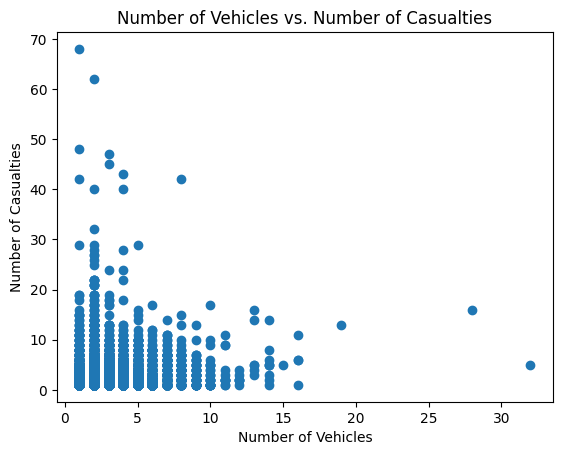

In [102]:
vehicle_casualty_corr = ac[['Number_of_Vehicles', 'Number_of_Casualties']].corr().iloc[0, 1]
vehicle_casualty_corr

plt.scatter(ac['Number_of_Vehicles'], ac['Number_of_Casualties'])

plt.title('Number of Vehicles vs. Number of Casualties')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.show()

<h1>Insight 21</h1>
<h2> What year is the highest number of casualties </h2>

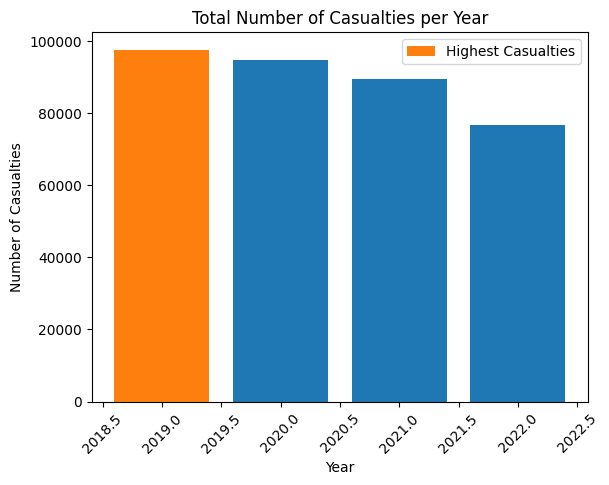

In [104]:
avg_casualties = ac.groupby('Year')['Number_of_Casualties'].sum()
avg_casualties

highest_casualty_year = avg_casualties.idxmax()
plt.bar(avg_casualties.index, avg_casualties.values)

plt.bar(highest_casualty_year, avg_casualties[highest_casualty_year], label='Highest Casualties')

plt.title('Total Number of Casualties per Year')
plt.ylabel('Number of Casualties')
plt.xlabel('Year')
plt.legend()
plt.xticks(rotation=45) 
plt.show()

<h1>Insight 22</h1>
<h2> What year is the highest number of Accident </h2>

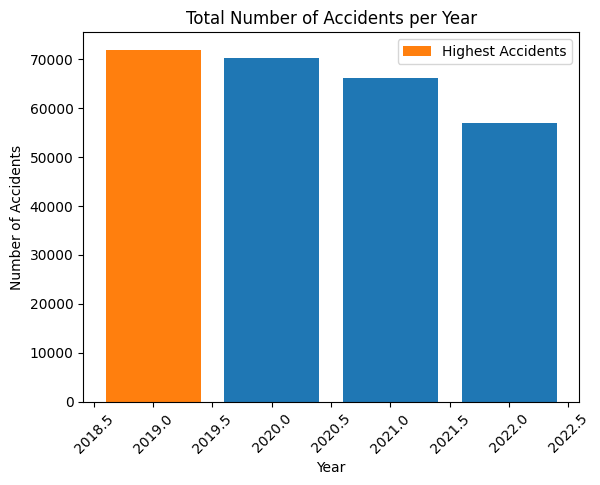

In [105]:
avg_casualties = ac.groupby('Year')['Accident Date'].value_counts()
avg_casualties

yearly_accidents = avg_casualties.groupby(level=0).sum() 
highest_accident_year = yearly_accidents.idxmax()


plt.bar(yearly_accidents.index, yearly_accidents.values)

plt.bar(highest_accident_year, yearly_accidents[highest_accident_year], label='Highest Accidents')

plt.title('Total Number of Accidents per Year')
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.legend()
plt.xticks(rotation=45) 
plt.show()

<h1>Insight 23</h1>
<h2> What is the most common accident severity in urban vs rural areas? </h2>

In [111]:
most_comm_severity_area = ac.groupby("Urban_or_Rural_Area")["Accident_Severity"].agg(lambda x: x.mode()[0])
most_comm_severity_area

Urban_or_Rural_Area
Rural          Slight
Unallocated    Slight
Urban          Slight
Name: Accident_Severity, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

<h1>Line</h1>

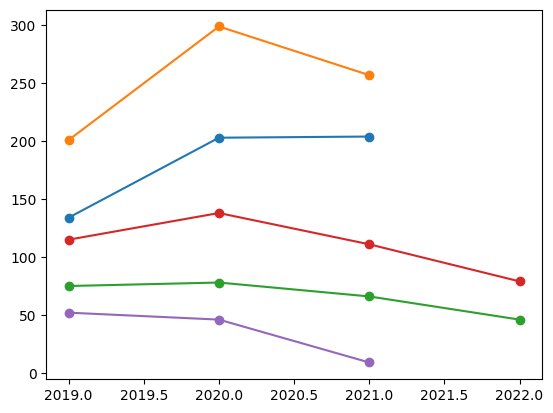

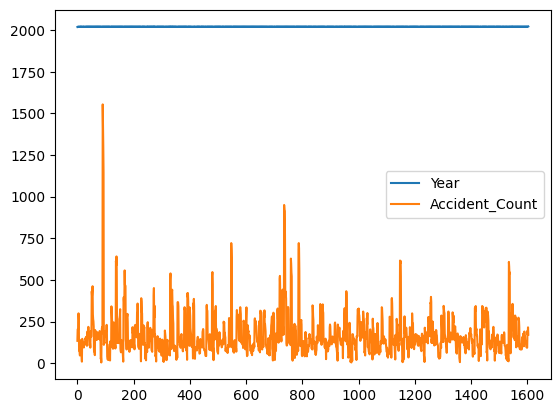

In [43]:
year_area = ac.groupby(['District Area' , 'Year']).size().reset_index(name = 'Accident_Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

plt.plot(easy_df.index, easy_df['Aberdeen City'], label='Aberdeen City', marker='o')
plt.plot(easy_df.index, easy_df['Aberdeenshire'], label='Aberdeenshire', marker='o')
plt.plot(easy_df.index, easy_df['Adur'], label='Adur', marker='o')
plt.plot(easy_df.index, easy_df['Allerdale'], label='Allerdale', marker='o')
plt.plot(easy_df.index, easy_df['Alnwick'], label='Alnwick', marker='o')

year_area.plot()
plt.show()

<h1>Correlation</h1>

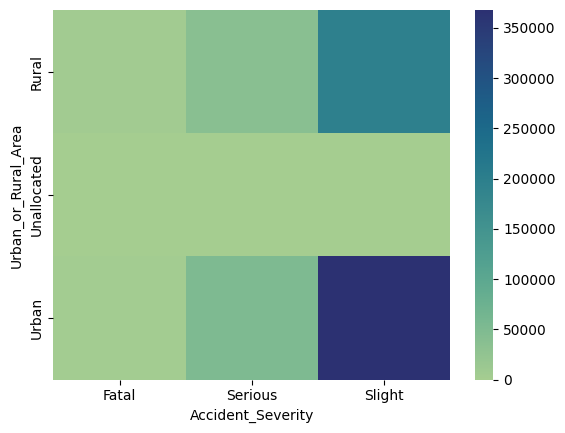

In [44]:
cas_veh = ac.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()

sns.heatmap(cas_veh, cmap='crest')
plt.show()

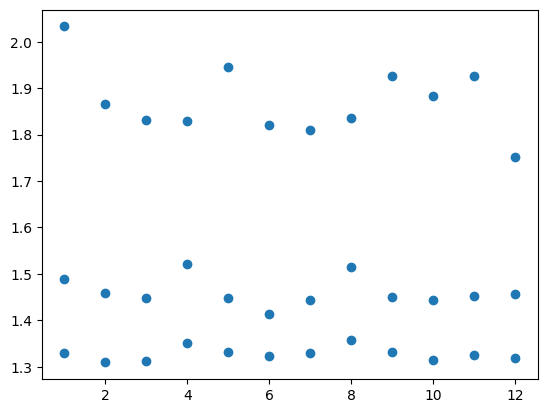

In [45]:
cas_sev = ac.groupby(['Accident_Severity', 'Month'])['Number_of_Casualties'].mean().reset_index(name='average accident')

plt.scatter(cas_sev['Month'], cas_sev['average accident'])
plt.show()

<h1>Insight 1</h1>
<h2> Total accidents by severity </h2>